In [1]:
import pandas as pd
import numpy as np
path = './data/'

In [2]:
station_coordinates = pd.read_csv(path+'coordinates.csv').drop(['Cluster','City'], 1)
station_coordinates['Metro'] = 'Other' 
station_coordinates.head()

,StationID,Longitude,Latitude,Metro
0,1001A,116.366,39.8673,Other
1,1002A,116.170,40.2865,Other
2,1003A,116.434,39.9522,Other
3,1004A,116.434,39.8745,Other
4,1005A,116.473,39.9716,Other


## 21 pre-designated cities 

In [3]:
cities = pd.read_excel(path+'cities.xlsx')
cities.head()

,City,Latitude,Longitude
0,Beijing,39.916667,116.383333
1,Shanghai,31.228611,121.474722
2,Xian,34.266667,108.900000
3,Urumqi,43.825000,87.600000
4,Lhasa,29.650000,91.116667


### Determine which stations (in station_coordinates table above) belong to each of the 21 metro areas. 

In [4]:
for c in range(len(cities)):
    city_name = cities.loc[c, 'City']
    city_lat = cities.loc[c, 'Latitude']
    city_long = cities.loc[c, 'Longitude']
    for i in range(len(station_coordinates)):
        station_lat = station_coordinates.loc[i, 'Latitude']
        station_long = station_coordinates.loc[i, 'Longitude']
        if abs(station_lat - city_lat) < 0.25 and abs(station_long - city_long) < 0.25:
            station_coordinates.loc[i, 'Metro'] = city_name

In [5]:
station_coordinates.head()

,StationID,Longitude,Latitude,Metro
0,1001A,116.366,39.8673,Beijing
1,1002A,116.170,40.2865,Other
2,1003A,116.434,39.9522,Beijing
3,1004A,116.434,39.8745,Beijing
4,1005A,116.473,39.9716,Beijing


In [6]:
#Stations Per Metro Area
station_coordinates[station_coordinates['Metro']!='Other'].groupby('Metro').count()[['StationID']]

,StationID
Metro,
Baotou,6
Beijing,8
Changsha,11
Chengdu,6
Chongqing,14
Fuzhou,6
Guangzhou,11
Harbin,11
Kunming,7


/Users/Brenton/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Brenton/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/Brenton/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Brenton/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


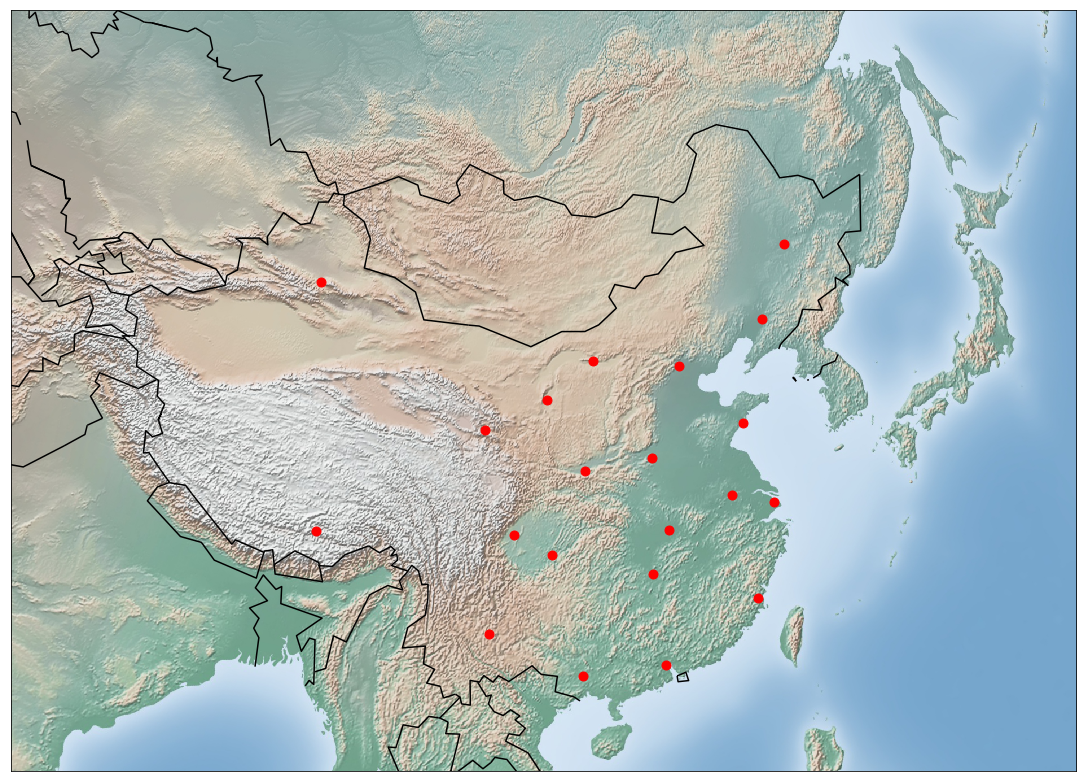

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
# setup Lambert Conformal basemap.
plt.figure(figsize=[20, 14])
m = Basemap(width=7000000,height=5000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=50,lat_0=39,lon_0=106.)
m.shadedrelief()
m.drawcountries(linewidth=1.5)

lons = cities['Longitude']
lats = cities['Latitude']

for i in range(len(lons)):
    lon = lons[i]
    lat = lats[i]
    x,y = m(lon, lat)
    m.plot(x, y, 'ro', markersize=9)

print()

# Pick one station per metro area -- 21 total stations 

In [10]:
AQI = pd.read_csv(path+'AQI.csv')
AQI = AQI.drop('Unnamed: 0', 1)

#Convert date column into a "real" date column, not a floating number
AQI['date'] = AQI['date'].astype(int).astype(str)
AQI['date'] = pd.to_datetime(AQI['date']).dt.date

#Reshuffle columns so that date, hour, type are at the front
observation_cols = list(AQI.columns.values[:-3])
cols = list(AQI.columns.values[-3:])
cols.extend(observation_cols)

AQI = AQI[cols]
print(len(AQI))
AQI.head()

21962


,date,hour,type,1001A,1002A,1003A,1004A,1005A,1006A,1007A,...,2706A,2707A,2708A,2709A,2710A,2711A,2835A,2842A,2845A,2846A
0,2014-05-13,0.0,AQI,73.0,32.0,84.0,67.0,75.0,83.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-05-13,1.0,AQI,74.0,43.0,89.0,NaN,73.0,79.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-05-13,2.0,AQI,76.0,83.0,92.0,NaN,82.0,88.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-05-13,3.0,AQI,76.0,35.0,91.0,NaN,88.0,80.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-05-13,4.0,AQI,79.0,54.0,98.0,NaN,94.0,82.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import datetime
Times = pd.DataFrame(pd.date_range(datetime.date(2014, 5, 13), datetime.date(2017, 1, 1), freq='H')[:-1])\
          .rename(columns={0: 'Time'})
    
Times['date'] = Times['Time'].dt.date
Times['hour'] = Times['Time'].dt.hour
Times['month'] = Times['Time'].dt.month
Times['weekday'] = Times['Time'].dt.weekday
Times = Times.drop('Time',1)

AQI = AQI.merge(Times, on=['date', 'hour'], how='right')
AQI = AQI.sort_values(by=['date','hour']).reset_index(drop=True)
print(len(AQI))

23136


In [12]:
counts_per_station = dict()
for c in observation_cols:
    counts_per_station[c] = len(AQI[c].dropna())
    
cts = pd.DataFrame(pd.Series(counts_per_station)).reset_index()
cts = cts.rename(columns={'index':'StationID', 0:'count'})

#Merge with coordinates table.
Coordinates = station_coordinates.merge(cts, on='StationID').drop(['Longitude','Latitude'], 1)
Stations_DF = Coordinates.sort_values(by=['Metro', 'count']) \
                                .drop_duplicates(subset=['Metro'], keep='last')

Stations_To_Use = Stations_DF[Stations_DF['Metro']!='Other'].reset_index(drop=True)
Stations_To_Use = Stations_To_Use[['StationID', 'Metro']]

In [13]:
Stations_To_Use

,StationID,Metro
0,1589A,Baotou
1,1012A,Beijing
2,1342A,Changsha
3,1434A,Chengdu
4,1419A,Chongqing
5,1282A,Fuzhou
6,1349A,Guangzhou
7,1129A,Harbin
8,1453A,Kunming
9,1456A,Lhasa


In [14]:
Stations_To_Use.to_csv(path+'Station_Metro_Codes.csv')